# ***PROJECT***

# Sports image classification
**Shwetank Singh, Akash Kumar Sharma**

**4th of August, 2021**


# Abstract
In this Project we have used Convolutional Neural Network to recognise the sport from its image. We have considered 22 sports as "badminton", "baseball", "basketball", "boxing", "chess", "cricket", "fencing", "football", "formula1", "gymnastics", "hockey", "ice_hockey", "kabaddi", "motogp", "shooting", "swimming", "table_tennis", "tennis", "volleyball", "weight_lifting", "wrestling", "wwe". 
‘sports-image-dataset’, consists of 14141 observations/images with sports name as labels. Firstly, the data is divided into training set, validation set and test set with ratio 8:1:1. Then from the training set we found out the number of observations corresponding to each label. Next, we trained the training data on different models and based on accuracy from the Validation set , we have chosen the best model and found its test accuracy. Lastly, we test our model with some real examples. Here, we have only provided the best of all the models which we have tried.

# INTRODUCTION

In the era of Artificial Intelligence many unbelievable things become possible. Using a machine we can find out the person in front of you are telling lie or truth, just seeing a image of person Facebook can detect its name and details, hearing our voice Google understands and shows us the relevant websites etc. 
CNN in Deep Learning is one such tool to achieve perfection in image recognition. Significant additional impacts in image or object recognition were felt from 2011 to 2012. Although CNNs trained by backpropagation had been around for decades, and GPU implementations of NNs for years, including CNNs, fast implementations of CNNs with max-pooling on GPUs in the style of Ciresan and colleagues were needed to progress on computer vision. In 2011, this approach achieved for the first time superhuman performance in a visual pattern recognition contest. Also in 2011, it won the ICDAR Chinese handwriting contest, and in May 2012, it won the ISBI image segmentation contest. Until 2011, CNNs did not play a major role at computer vision conferences, but in June 2012, a paper by Ciresan et al. at the leading conference CVPR showed how max-pooling CNNs on GPU can dramatically improve many vision benchmark records. In November 2012, Ciresan et al.'s system also won the ICPR contest on analysis of large medical images for cancer detection.

Here we also used CNN to recognise sports name by seeing the picture of the sport.

# OBJECTIVE
Objective of the project is to develop a sport recogniser based on 14.1K sample images.

# DATA INFORMATION

This ‘sports-image-dataset’ data is collected from Kaggle. There are 14141 examples in the data and each example is rbg image. Data is divided into 80%, 10% and 10% respectively for train set, dev set and test set. Thus we get 11312 examples in the train set, 1414 examples the dev set and 1415 images in the test set.  The data consists of 22 folders with label name as sports name. Each folder consists of around 800-900 images. This dataset is collected from Google Images using Images Scrapper.

It consists of 22 folders with label name as sports name. Each folder consists of around 800-900 images. This dataset is collected from Google Images using Images Scrapper.

# ANALYSIS

In the whole analysis various models are used. These models vary by hyperparameters such as number of convnet layers, number of fully connected layers, number of filters, size of filter, activation functions, dropout and even training data size. As there are twentytwo categories , ‘softmax’ activation is in the final layer instead of ‘sigmoid’ (which is used for binary category). Keras is used in the analysis with Tensorflow at the backend.

In [49]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/sports-image-dataset/data/ice_hockey/00000503.jpg
/kaggle/input/sports-image-dataset/data/ice_hockey/00000390.jpg
/kaggle/input/sports-image-dataset/data/ice_hockey/00000601.jpg
/kaggle/input/sports-image-dataset/data/ice_hockey/00000030.jpg
/kaggle/input/sports-image-dataset/data/ice_hockey/00000567.jpg
/kaggle/input/sports-image-dataset/data/ice_hockey/00000686.jpg
/kaggle/input/sports-image-dataset/data/ice_hockey/00000042.jpg
/kaggle/input/sports-image-dataset/data/ice_hockey/00000080.jpg
/kaggle/input/sports-image-dataset/data/ice_hockey/00000027.jpg
/kaggle/input/sports-image-dataset/data/ice_hockey/00000127.jpg
/kaggle/input/sports-image-dataset/data/ice_hockey/00000535.jpeg
/kaggle/input/sports-image-dataset/data/ice_hockey/00000335.jpg
/kaggle/input/sports-image-dataset/data/ice_hockey/00000382.jpg
/kaggle/input/sports-image-dataset/data/ice_hockey/00000233.jpg
/kaggle/input/sports-image-dataset/data/ice_hockey/00000640.jpg
/kaggle/input/sports-image-dataset/data

# Necessary modules to Import

In [2]:
! pip install imutils

In [3]:
import matplotlib
matplotlib.use("Agg")
import matplotlib.pyplot as plt

# import the necessary packages

from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import SGD
from keras.models import Sequential
from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers.core import Activation
from keras.layers.core import Flatten
from keras.layers.core import Dropout
from keras.layers.core import Dense
from keras import backend as K
from imutils import paths
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import argparse
import random
import pickle
import cv2
import os
%matplotlib inline

# Visiting the data
Let's check the data.

In [4]:
# initialize the data and labels
print("[INFO] loading images...")
data = []
labels = []
#Enter the path of your image data folder
image_data_folder_path = "../input/sports-image-dataset/data"

# grab the image paths and randomly shuffle them
imagePaths = sorted(list(paths.list_images(image_data_folder_path)))

total_number_of_images = len(imagePaths)
print("\n")
print("Total number of images----->",total_number_of_images)
random.shuffle(imagePaths)

# loop over the input images
for imagePath in imagePaths:
    # load the image, resize it to 84x84 pixels (the required input
    # spatial dimensions of SmallVGGNet), and store the image in the
    # data list
    image = cv2.imread(imagePath)
    image = cv2.resize(image, (84,84))
    data.append(image)

    # extract the class label from the image path and update the
    # labels list
    label = imagePath.split(os.path.sep)[-2]
    labels.append(label)
print ("data",data[0].shape)

# scale the raw pixel intensities to the range [0, 1]
data = np.array(data, dtype="float") / 255.0
labels = np.array(labels)
print(labels)
print(labels.shape)

[INFO] loading images...


Total number of images-----> 14141
data (84, 84, 3)
['formula1' 'cricket' 'basketball' ... 'shooting' 'table_tennis'
 'baseball']
(14141,)


In [5]:
# partition the data into training and testing splits using 80% of
# the data for training and the remaining 20% for testing
(trainX, val_testX, trainY, val_testY) = train_test_split(data, labels, test_size=0.2, random_state=42)
print ("trainX.shape------>>",trainX.shape)
(testX, valX, testY, valY) = train_test_split(val_testX, val_testY, test_size=0.5, random_state=42)

# convert the labels from integers to vectors
lb = LabelBinarizer()
trainY = lb.fit_transform(trainY)
testY = lb.transform(testY)
valY = lb.transform(valY)

height = 84
width = 84
depth =3

inputShape = (height, width, depth)

classes = len(lb.classes_)
print("Number of classes:",classes)
print("Number of training images:", len(trainX))
print("Number of validation images:", len(valY))
print("Number of test images:", len(testX))

trainX.shape------>> (11312, 84, 84, 3)
Number of classes: 22
Number of training images: 11312
Number of validation images: 1415
Number of test images: 1414


Dividing data into training set, validation(developement) set and testing set

In [6]:
classes_name =  ["badminton", "baseball", "basketball", "boxing", 
                "chess", "cricket", "fencing", "football", "formula1", 
                "gymnastics", "hockey", "ice_hockey", "kabaddi", "motogp", 
                "shooting", "swimming", "table_tennis", "tennis", "volleyball", 
                "weight_lifting", "wrestling", "wwe"]

# Plotting some images from data randomly

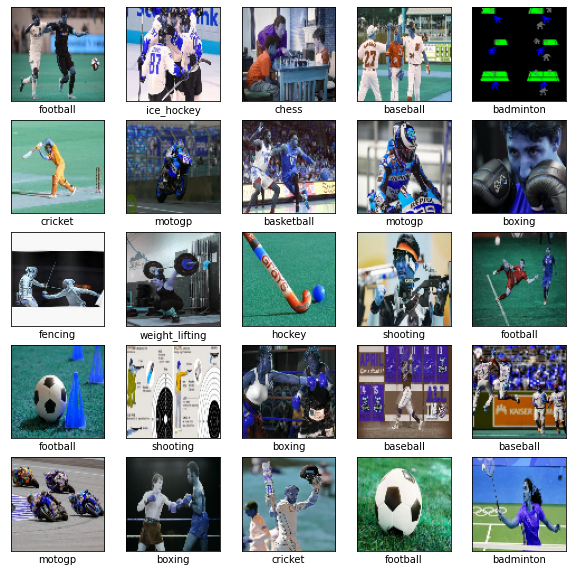

In [7]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(trainX[i], cmap=plt.cm.binary)
    plt.xlabel(classes_name[np.argmax(trainY[i])])
plt.show()

In [8]:
# initialize number of epochs to train for, and batch size
EPOCHS = 50
BS = 32

number of epochs and batch size

In [9]:
random_state = 99

# **MODEL1**

In [10]:
chanDim=3
model1 = Sequential()
# CONV => RELU => POOL layer set
model1.add(Conv2D(32, (3, 3), padding="same", input_shape=inputShape))
model1.add(Activation("relu"))
model1.add(BatchNormalization(axis=chanDim))
model1.add(MaxPooling2D(pool_size=(2, 2)))
model1.add(Dropout(0.25))

# (CONV => RELU) * 2 => POOL layer set
model1.add(Conv2D(64, (3, 3), padding="same"))
model1.add(Activation("relu"))
model1.add(BatchNormalization(axis=chanDim))
model1.add(Conv2D(64, (3, 3), padding="same"))
model1.add(Activation("relu"))
model1.add(BatchNormalization(axis=chanDim))
model1.add(MaxPooling2D(pool_size=(2, 2)))
model1.add(Dropout(0.25))

# (CONV => RELU) * 3 => POOL layer set
model1.add(Conv2D(128, (3, 3), padding="same"))
model1.add(Activation("relu"))
model1.add(BatchNormalization(axis=chanDim))
model1.add(Conv2D(128, (3, 3), padding="same"))
model1.add(Activation("relu"))
model1.add(BatchNormalization(axis=chanDim))
model1.add(Conv2D(128, (3, 3), padding="same"))
model1.add(Activation("relu"))
model1.add(BatchNormalization(axis=chanDim))
model1.add(MaxPooling2D(pool_size=(2, 2)))
model1.add(Dropout(0.25))

# first (and only) set of FC => RELU layers
model1.add(Flatten())
model1.add(Dense(512))
model1.add(Activation("relu"))
model1.add(BatchNormalization())
model1.add(Dropout(0.5))
model1.add(Dense(128))
model1.add(Activation("relu"))
model1.add(BatchNormalization())
model1.add(Dropout(0.3))


# softmax classifier
model1.add(Dense(classes))
model1.add(Activation("softmax"))


model1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 84, 84, 32)        896       
_________________________________________________________________
activation (Activation)      (None, 84, 84, 32)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 84, 84, 32)        128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 42, 42, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 42, 42, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 42, 42, 64)        18496     
_________________________________________________________________
activation_1 (Activation)    (None, 42, 42, 64)        0

In [11]:
# initialize the model and optimizer
model1.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [12]:
# train the network
H1 = model1.fit(trainX, trainY, batch_size=BS,
    validation_data=(valX, valY), steps_per_epoch=len(trainX) // BS,
    epochs=EPOCHS)

Epoch 1/50
353/353 [==============================] - 9s 19ms/step - loss: 3.0707 - accuracy: 0.1817 - val_loss: 4.0136 - val_accuracy: 0.1237
Epoch 2/50
353/353 [==============================] - 6s 16ms/step - loss: 2.2058 - accuracy: 0.3490 - val_loss: 2.0029 - val_accuracy: 0.4155
Epoch 3/50
353/353 [==============================] - 6s 16ms/step - loss: 1.9152 - accuracy: 0.4275 - val_loss: 1.9261 - val_accuracy: 0.4360
Epoch 4/50
353/353 [==============================] - 6s 17ms/step - loss: 1.7419 - accuracy: 0.4838 - val_loss: 2.1764 - val_accuracy: 0.3873
Epoch 5/50
353/353 [==============================] - 6s 16ms/step - loss: 1.5450 - accuracy: 0.5341 - val_loss: 1.6907 - val_accuracy: 0.5166
Epoch 6/50
353/353 [==============================] - 6s 16ms/step - loss: 1.3968 - accuracy: 0.5791 - val_loss: 2.4826 - val_accuracy: 0.3378
Epoch 7/50
353/353 [==============================] - 6s 16ms/step - loss: 1.3170 - accuracy: 0.6009 - val_loss: 1.5808 - val_accuracy: 0.5385

In [13]:
preds1=model1.evaluate(testX, testY, batch_size=32)
print('loss = '+str(preds1[0]))
print('test accuracy = '+str(preds1[1]))

45/45 [==============================] - 0s 7ms/step - loss: 1.9049 - accuracy: 0.6301
loss = 1.9049245119094849
test accuracy = 0.6301273107528687


We got 63.02% test accuracy using 'Adam' optimizer.

In [14]:
# evaluate the network
print("[INFO] evaluating network...")
predictions1 = model1.predict(valX, batch_size=32)
print(classification_report(valY.argmax(axis=1),
    predictions1.argmax(axis=1), target_names=lb.classes_))

[INFO] evaluating network...
                precision    recall  f1-score   support

     badminton       0.57      0.62      0.60        74
      baseball       0.70      0.66      0.68        67
    basketball       0.73      0.58      0.65        60
        boxing       0.72      0.59      0.65        66
         chess       0.54      0.56      0.55        61
       cricket       0.77      0.64      0.70        75
       fencing       0.41      0.56      0.47        55
      football       0.69      0.69      0.69        80
      formula1       0.57      0.68      0.62        69
    gymnastics       0.57      0.44      0.50        75
        hockey       0.52      0.49      0.51        49
    ice_hockey       0.77      0.74      0.76        65
       kabaddi       0.91      0.71      0.80        42
        motogp       0.74      0.74      0.74        72
      shooting       0.55      0.64      0.59        42
      swimming       0.72      0.91      0.80        69
  table_tennis    

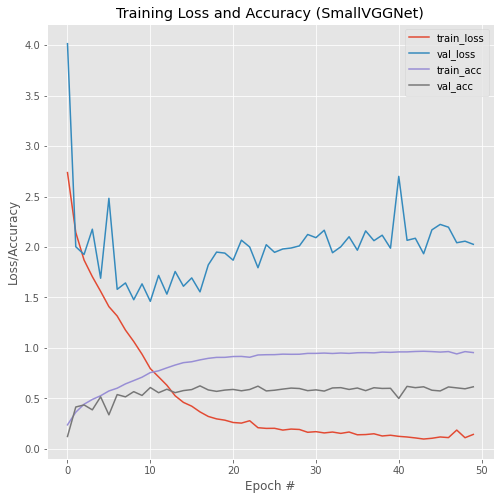

In [15]:
# plot the training loss and accuracy
N = np.arange(0, EPOCHS)
plt.style.use("ggplot")
plt.figure(figsize=(8,8))
plt.plot(N, H1.history["loss"], label="train_loss")
plt.plot(N, H1.history["val_loss"], label="val_loss")
plt.plot(N, H1.history["accuracy"], label="train_acc")
plt.plot(N, H1.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy (SmallVGGNet)")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()
plt.savefig("smallvggnet_plot.png")
plt.show()

Clearly the model is overfit. Now we want to do some regualrization, such as try some different optimizer.

# **MODEL 2**

In [16]:
chanDim=3
model2 = Sequential()
# CONV => RELU => POOL layer set
model2.add(Conv2D(32, (3, 3), padding="same", input_shape=inputShape))
model2.add(Activation("relu"))
model2.add(BatchNormalization(axis=chanDim))
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Dropout(0.25))

# (CONV => RELU) * 2 => POOL layer set
model2.add(Conv2D(64, (3, 3), padding="same"))
model2.add(Activation("relu"))
model2.add(BatchNormalization(axis=chanDim))
model2.add(Conv2D(64, (3, 3), padding="same"))
model2.add(Activation("relu"))
model2.add(BatchNormalization(axis=chanDim))
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Dropout(0.25))

# (CONV => RELU) * 3 => POOL layer set
model2.add(Conv2D(128, (3, 3), padding="same"))
model2.add(Activation("relu"))
model2.add(BatchNormalization(axis=chanDim))
model2.add(Conv2D(128, (3, 3), padding="same"))
model2.add(Activation("relu"))
model2.add(BatchNormalization(axis=chanDim))
model2.add(Conv2D(128, (3, 3), padding="same"))
model2.add(Activation("relu"))
model2.add(BatchNormalization(axis=chanDim))
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Dropout(0.25))

# first (and only) set of FC => RELU layers
model2.add(Flatten())
model2.add(Dense(512))
model2.add(Activation("relu"))
model2.add(BatchNormalization())
model2.add(Dropout(0.5))
model2.add(Dense(128))
model2.add(Activation("relu"))
model2.add(BatchNormalization())
model2.add(Dropout(0.3))


# softmax classifier
model2.add(Dense(classes))
model2.add(Activation("softmax"))


model2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 84, 84, 32)        896       
_________________________________________________________________
activation_9 (Activation)    (None, 84, 84, 32)        0         
_________________________________________________________________
batch_normalization_8 (Batch (None, 84, 84, 32)        128       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 42, 42, 32)        0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 42, 42, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 42, 42, 64)        18496     
_________________________________________________________________
activation_10 (Activation)   (None, 42, 42, 64)       

In [17]:
# initialize the model and optimizermodel2 = model()
model2.compile(loss="categorical_crossentropy", optimizer="RMSprop", metrics=["accuracy"])

In [18]:
H2 = model2.fit(trainX, trainY, batch_size=BS,
    validation_data=(valX, valY), steps_per_epoch=len(trainX) // BS,
    epochs=EPOCHS)

Epoch 1/50
353/353 [==============================] - 9s 19ms/step - loss: 3.1336 - accuracy: 0.1743 - val_loss: 3.8104 - val_accuracy: 0.1767
Epoch 2/50
353/353 [==============================] - 7s 18ms/step - loss: 2.2098 - accuracy: 0.3500 - val_loss: 2.3835 - val_accuracy: 0.3562
Epoch 3/50
353/353 [==============================] - 6s 18ms/step - loss: 1.9080 - accuracy: 0.4253 - val_loss: 2.0765 - val_accuracy: 0.4297
Epoch 4/50
353/353 [==============================] - 6s 18ms/step - loss: 1.7047 - accuracy: 0.4937 - val_loss: 1.6642 - val_accuracy: 0.5117
Epoch 5/50
353/353 [==============================] - 6s 18ms/step - loss: 1.5866 - accuracy: 0.5135 - val_loss: 1.6145 - val_accuracy: 0.5166
Epoch 6/50
353/353 [==============================] - 6s 18ms/step - loss: 1.4249 - accuracy: 0.5680 - val_loss: 1.6383 - val_accuracy: 0.5216
Epoch 7/50
353/353 [==============================] - 7s 19ms/step - loss: 1.3003 - accuracy: 0.6135 - val_loss: 1.5860 - val_accuracy: 0.5413

In [19]:
preds2=model2.evaluate(testX, testY, batch_size=32)
print('loss = '+str(preds2[0]))
print('test accuracy = '+str(preds2[1]))

45/45 [==============================] - 0s 6ms/step - loss: 1.9552 - accuracy: 0.6202
loss = 1.9551812410354614
test accuracy = 0.6202263236045837


We got 62.02% test accuracy using 'RMSprop' optimizer.

In [20]:
# evaluate the network
print("[INFO] evaluating network...")
predictions2 = model2.predict(valX, batch_size=32)
print(classification_report(valY.argmax(axis=1),
    predictions2.argmax(axis=1), target_names=lb.classes_))

[INFO] evaluating network...
                precision    recall  f1-score   support

     badminton       0.62      0.59      0.61        74
      baseball       0.67      0.76      0.71        67
    basketball       0.65      0.43      0.52        60
        boxing       0.50      0.65      0.57        66
         chess       0.50      0.54      0.52        61
       cricket       0.79      0.55      0.65        75
       fencing       0.57      0.58      0.58        55
      football       0.62      0.72      0.67        80
      formula1       0.48      0.62      0.54        69
    gymnastics       0.52      0.40      0.45        75
        hockey       0.55      0.45      0.49        49
    ice_hockey       0.68      0.86      0.76        65
       kabaddi       0.80      0.76      0.78        42
        motogp       0.88      0.60      0.71        72
      shooting       0.60      0.60      0.60        42
      swimming       0.77      0.94      0.85        69
  table_tennis    

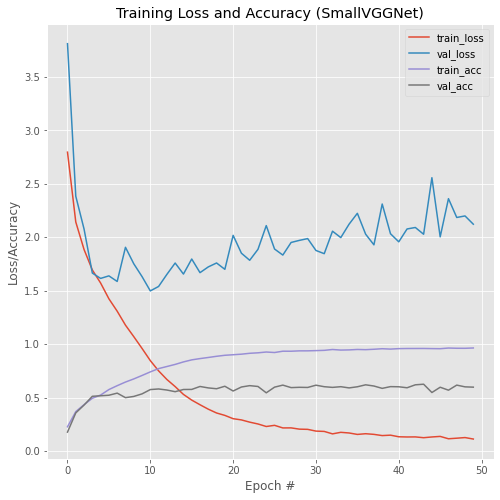

In [21]:
# plot the training loss and accuracy for model 2
N = np.arange(0, EPOCHS)
plt.style.use("ggplot")
plt.figure(figsize=(8,8))
plt.plot(N, H2.history["loss"], label="train_loss")
plt.plot(N, H2.history["val_loss"], label="val_loss")
plt.plot(N, H2.history["accuracy"], label="train_acc")
plt.plot(N, H2.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy (SmallVGGNet)")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()
plt.savefig("smallvggnet_plot.png")
plt.show()

Still we can observe high overfitting. So I want to try another optimizer.

# **MODEL 3**

In [22]:
chanDim=3
model3 = Sequential()
# CONV => RELU => POOL layer set
model3.add(Conv2D(32, (3, 3), padding="same", input_shape=inputShape))
model3.add(Activation("relu"))
model3.add(BatchNormalization(axis=chanDim))
model3.add(MaxPooling2D(pool_size=(2, 2)))
model3.add(Dropout(0.25))

# (CONV => RELU) * 2 => POOL layer set
model3.add(Conv2D(64, (3, 3), padding="same"))
model3.add(Activation("relu"))
model3.add(BatchNormalization(axis=chanDim))
model3.add(Conv2D(64, (3, 3), padding="same"))
model3.add(Activation("relu"))
model3.add(BatchNormalization(axis=chanDim))
model3.add(MaxPooling2D(pool_size=(2, 2)))
model3.add(Dropout(0.25))

# (CONV => RELU) * 3 => POOL layer set
model3.add(Conv2D(128, (3, 3), padding="same"))
model3.add(Activation("relu"))
model3.add(BatchNormalization(axis=chanDim))
model3.add(Conv2D(128, (3, 3), padding="same"))
model3.add(Activation("relu"))
model3.add(BatchNormalization(axis=chanDim))
model3.add(Conv2D(128, (3, 3), padding="same"))
model3.add(Activation("relu"))
model3.add(BatchNormalization(axis=chanDim))
model3.add(MaxPooling2D(pool_size=(2, 2)))
model3.add(Dropout(0.25))

# first (and only) set of FC => RELU layers
model3.add(Flatten())
model3.add(Dense(512))
model3.add(Activation("relu"))
model3.add(BatchNormalization())
model3.add(Dropout(0.5))
model3.add(Dense(128))
model3.add(Activation("relu"))
model3.add(BatchNormalization())
model3.add(Dropout(0.3))

# softmax classifier
model3.add(Dense(classes))
model3.add(Activation("softmax"))


model3.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 84, 84, 32)        896       
_________________________________________________________________
activation_18 (Activation)   (None, 84, 84, 32)        0         
_________________________________________________________________
batch_normalization_16 (Batc (None, 84, 84, 32)        128       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 42, 42, 32)        0         
_________________________________________________________________
dropout_10 (Dropout)         (None, 42, 42, 32)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 42, 42, 64)        18496     
_________________________________________________________________
activation_19 (Activation)   (None, 42, 42, 64)       

In [23]:
# initialize the model and optimizermodel2 = model()
model3.compile(loss="categorical_crossentropy", optimizer="adamax", metrics=["accuracy"])

In [24]:
H3 = model3.fit(trainX, trainY, batch_size=BS,
    validation_data=(valX, valY), steps_per_epoch=len(trainX) // BS,
    epochs=EPOCHS)

Epoch 1/50
353/353 [==============================] - 8s 18ms/step - loss: 3.1376 - accuracy: 0.1685 - val_loss: 3.8404 - val_accuracy: 0.0806
Epoch 2/50
353/353 [==============================] - 6s 17ms/step - loss: 2.3410 - accuracy: 0.3216 - val_loss: 2.2046 - val_accuracy: 0.3618
Epoch 3/50
353/353 [==============================] - 6s 17ms/step - loss: 2.0516 - accuracy: 0.4001 - val_loss: 1.9390 - val_accuracy: 0.4276
Epoch 4/50
353/353 [==============================] - 6s 17ms/step - loss: 1.9227 - accuracy: 0.4284 - val_loss: 1.9955 - val_accuracy: 0.4127
Epoch 5/50
353/353 [==============================] - 6s 16ms/step - loss: 1.7854 - accuracy: 0.4709 - val_loss: 1.8592 - val_accuracy: 0.4700
Epoch 6/50
353/353 [==============================] - 6s 16ms/step - loss: 1.6662 - accuracy: 0.4969 - val_loss: 1.7420 - val_accuracy: 0.5018
Epoch 7/50
353/353 [==============================] - 6s 17ms/step - loss: 1.5433 - accuracy: 0.5393 - val_loss: 1.6491 - val_accuracy: 0.5216

In [25]:
preds3=model3.evaluate(testX, testY, batch_size=32)
print('loss = '+str(preds3[0]))
print('test accuracy = '+str(preds3[1]))

45/45 [==============================] - 0s 6ms/step - loss: 1.7647 - accuracy: 0.6429
loss = 1.7647085189819336
test accuracy = 0.6428571343421936


We got 64.28% test accuracy using 'Adamax' optimizer.

In [26]:
# evaluate the network
print("[INFO] evaluating network...")
predictions3 = model3.predict(valX, batch_size=32)
print(classification_report(valY.argmax(axis=1),
    predictions3.argmax(axis=1), target_names=lb.classes_))

[INFO] evaluating network...
                precision    recall  f1-score   support

     badminton       0.62      0.68      0.65        74
      baseball       0.66      0.70      0.68        67
    basketball       0.59      0.50      0.54        60
        boxing       0.69      0.58      0.63        66
         chess       0.55      0.44      0.49        61
       cricket       0.62      0.60      0.61        75
       fencing       0.51      0.53      0.52        55
      football       0.66      0.68      0.67        80
      formula1       0.63      0.67      0.65        69
    gymnastics       0.56      0.47      0.51        75
        hockey       0.51      0.49      0.50        49
    ice_hockey       0.63      0.88      0.73        65
       kabaddi       0.71      0.71      0.71        42
        motogp       0.81      0.76      0.79        72
      shooting       0.57      0.60      0.58        42
      swimming       0.86      0.96      0.90        69
  table_tennis    

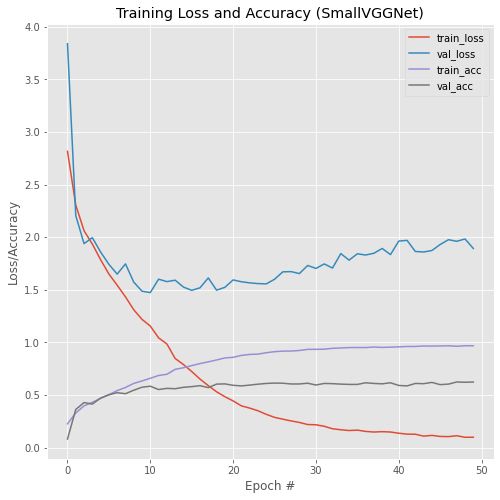

In [27]:
# plot the training loss and accuracy for model 2
N = np.arange(0, EPOCHS)
plt.style.use("ggplot")
plt.figure(figsize=(8,8))
plt.plot(N, H3.history["loss"], label="train_loss")
plt.plot(N, H3.history["val_loss"], label="val_loss")
plt.plot(N, H3.history["accuracy"], label="train_acc")
plt.plot(N, H3.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy (SmallVGGNet)")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()
plt.savefig("smallvggnet_plot.png")
plt.show()

Still we are facing the problem of overfitting. Now we will try some other regularization like adding or increasing Dropouts.

# **MODEL 4**

In [28]:
chanDim=3
model4 = Sequential()
# CONV => RELU => POOL layer set
model4.add(Conv2D(32, (3, 3), padding="same", input_shape=inputShape))
model4.add(Activation("relu"))
model4.add(BatchNormalization(axis=chanDim))
model4.add(MaxPooling2D(pool_size=(2, 2)))
model4.add(Dropout(0.5))

# (CONV => RELU) * 2 => POOL layer set
model4.add(Conv2D(64, (3, 3), padding="same"))
model4.add(Activation("relu"))
model4.add(BatchNormalization(axis=chanDim))
model4.add(Conv2D(64, (3, 3), padding="same"))
model4.add(Activation("relu"))
model4.add(BatchNormalization(axis=chanDim))
model4.add(MaxPooling2D(pool_size=(2, 2)))
model4.add(Dropout(0.5))

# (CONV => RELU) * 3 => POOL layer set
model4.add(Conv2D(128, (3, 3), padding="same"))
model4.add(Activation("relu"))
model4.add(BatchNormalization(axis=chanDim))
model4.add(Conv2D(128, (3, 3), padding="same"))
model4.add(Activation("relu"))
model4.add(BatchNormalization(axis=chanDim))
model4.add(Conv2D(128, (3, 3), padding="same"))
model4.add(Activation("relu"))
model4.add(BatchNormalization(axis=chanDim))
model4.add(MaxPooling2D(pool_size=(2, 2)))
model4.add(Dropout(0.5))

# first (and only) set of FC => RELU layers
model4.add(Flatten())
model4.add(Dense(512))
model4.add(Activation("relu"))
model4.add(BatchNormalization())
model4.add(Dropout(0.5))
model4.add(Dense(128))
model4.add(Activation("relu"))
model4.add(BatchNormalization())
model4.add(Dropout(0.3))

# softmax classifier
model4.add(Dense(classes))
model4.add(Activation("softmax"))


model4.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_18 (Conv2D)           (None, 84, 84, 32)        896       
_________________________________________________________________
activation_27 (Activation)   (None, 84, 84, 32)        0         
_________________________________________________________________
batch_normalization_24 (Batc (None, 84, 84, 32)        128       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 42, 42, 32)        0         
_________________________________________________________________
dropout_15 (Dropout)         (None, 42, 42, 32)        0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 42, 42, 64)        18496     
_________________________________________________________________
activation_28 (Activation)   (None, 42, 42, 64)       

In [29]:
# initialize the model and optimizermodel2 = model()
model4.compile(loss="categorical_crossentropy", optimizer="RMSprop", metrics=["accuracy"])

In [30]:
H4 = model4.fit(trainX, trainY, batch_size=BS,
    validation_data=(valX, valY), steps_per_epoch=len(trainX) // BS,
    epochs=EPOCHS)

Epoch 1/50
353/353 [==============================] - 9s 20ms/step - loss: 3.1727 - accuracy: 0.1577 - val_loss: 5.0757 - val_accuracy: 0.1654
Epoch 2/50
353/353 [==============================] - 6s 18ms/step - loss: 2.2513 - accuracy: 0.3327 - val_loss: 2.1059 - val_accuracy: 0.4042
Epoch 3/50
353/353 [==============================] - 7s 19ms/step - loss: 1.9260 - accuracy: 0.4270 - val_loss: 2.0144 - val_accuracy: 0.4403
Epoch 4/50
353/353 [==============================] - 6s 18ms/step - loss: 1.7421 - accuracy: 0.4747 - val_loss: 2.1074 - val_accuracy: 0.4375
Epoch 5/50
353/353 [==============================] - 6s 18ms/step - loss: 1.6163 - accuracy: 0.5202 - val_loss: 1.7274 - val_accuracy: 0.4947
Epoch 6/50
353/353 [==============================] - 6s 18ms/step - loss: 1.4854 - accuracy: 0.5542 - val_loss: 1.7777 - val_accuracy: 0.4905
Epoch 7/50
353/353 [==============================] - 6s 18ms/step - loss: 1.3820 - accuracy: 0.5856 - val_loss: 1.9333 - val_accuracy: 0.4721

In [31]:
preds4=model4.evaluate(testX, testY, batch_size=32)
print('loss = '+str(preds4[0]))
print('test accuracy = '+str(preds4[1]))

45/45 [==============================] - 0s 6ms/step - loss: 1.7345 - accuracy: 0.6344
loss = 1.7344534397125244
test accuracy = 0.6343705654144287


We got 63.43% test accuracy when we increased the dropouts.

In [32]:
# evaluate the network
print("[INFO] evaluating network...")
predictions4 = model4.predict(valX, batch_size=32)
print(classification_report(valY.argmax(axis=1),
    predictions4.argmax(axis=1), target_names=lb.classes_))

[INFO] evaluating network...
                precision    recall  f1-score   support

     badminton       0.55      0.66      0.60        74
      baseball       0.64      0.73      0.68        67
    basketball       0.69      0.55      0.61        60
        boxing       0.76      0.62      0.68        66
         chess       0.64      0.46      0.53        61
       cricket       0.68      0.64      0.66        75
       fencing       0.42      0.51      0.46        55
      football       0.67      0.69      0.68        80
      formula1       0.79      0.48      0.59        69
    gymnastics       0.51      0.53      0.52        75
        hockey       0.47      0.51      0.49        49
    ice_hockey       0.74      0.85      0.79        65
       kabaddi       0.70      0.76      0.73        42
        motogp       0.78      0.78      0.78        72
      shooting       0.48      0.62      0.54        42
      swimming       0.77      0.93      0.84        69
  table_tennis    

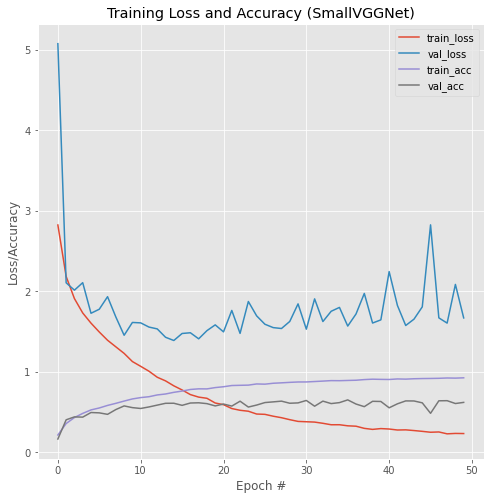

In [33]:
# plot the training loss and accuracy for model 2
N = np.arange(0, EPOCHS)
plt.style.use("ggplot")
plt.figure(figsize=(8,8))
plt.plot(N, H4.history["loss"], label="train_loss")
plt.plot(N, H4.history["val_loss"], label="val_loss")
plt.plot(N, H4.history["accuracy"], label="train_acc")
plt.plot(N, H4.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy (SmallVGGNet)")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()
plt.savefig("smallvggnet_plot.png")
plt.show()

We can observe overfitting is reduced but we are loosing accuracy at the same time.
To tackle both these problems together we will increase our training data. We will do so by using Data Augmentation.

# **MODEL 5**

In [34]:
# Data Augmentation
aug = ImageDataGenerator(rotation_range=30, width_shift_range=0.1,
    height_shift_range=0.1, shear_range=0.2, zoom_range=0.2,
    horizontal_flip=True, fill_mode="nearest")

In [35]:
chanDim=3
model5 = Sequential()
# CONV => RELU => POOL layer set
model5.add(Conv2D(64, (3, 3), padding="same", input_shape=inputShape))
model5.add(Activation("relu"))
model5.add(BatchNormalization(axis=chanDim))
model5.add(Conv2D(64, (3, 3), padding="same"))
model5.add(Activation("relu"))
model5.add(BatchNormalization(axis=chanDim))
model5.add(MaxPooling2D(pool_size=(2, 2)))
model5.add(Dropout(0.25))

# (CONV => RELU) * 2 => POOL layer set
model5.add(Conv2D(128, (3, 3), padding="same"))
model5.add(Activation("relu"))
model5.add(BatchNormalization(axis=chanDim))
model5.add(Conv2D(128, (3, 3), padding="same"))
model5.add(Activation("relu"))
model5.add(BatchNormalization(axis=chanDim))
model5.add(MaxPooling2D(pool_size=(2, 2)))
model5.add(Dropout(0.3))

# (CONV => RELU) * 3 => POOL layer set
model5.add(Conv2D(256, (3, 3), padding="same"))
model5.add(Activation("relu"))
model5.add(BatchNormalization(axis=chanDim))
model5.add(Conv2D(256, (3, 3), padding="same"))
model5.add(Activation("relu"))
model5.add(BatchNormalization(axis=chanDim))
model5.add(Conv2D(256, (3, 3), padding="same"))
model5.add(Activation("relu"))
model5.add(BatchNormalization(axis=chanDim))
model5.add(MaxPooling2D(pool_size=(2, 2)))
model5.add(Dropout(0.5))

# first (and only) set of FC => RELU layers
model5.add(Flatten())
model5.add(Dense(512))
model5.add(Activation("relu"))
model5.add(BatchNormalization())
model5.add(Dropout(0.5))
model5.add(Dense(128))
model5.add(Activation("relu"))
model5.add(BatchNormalization())
model5.add(Dropout(0.3))

# softmax classifier
model5.add(Dense(classes))
model5.add(Activation("softmax"))


model5.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_24 (Conv2D)           (None, 84, 84, 64)        1792      
_________________________________________________________________
activation_36 (Activation)   (None, 84, 84, 64)        0         
_________________________________________________________________
batch_normalization_32 (Batc (None, 84, 84, 64)        256       
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 84, 84, 64)        36928     
_________________________________________________________________
activation_37 (Activation)   (None, 84, 84, 64)        0         
_________________________________________________________________
batch_normalization_33 (Batc (None, 84, 84, 64)        256       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 42, 42, 64)       

In [36]:
# initialize the model and optimizermodel2 = model()
model5.compile(loss="categorical_crossentropy", optimizer="RMSprop", metrics=["accuracy"])

In [37]:
H5 = model5.fit(aug.flow(trainX, trainY, batch_size=BS),
    validation_data=(valX, valY), steps_per_epoch=len(trainX) // BS,
    epochs=100)

Epoch 1/100
353/353 [==============================] - 30s 78ms/step - loss: 3.1630 - accuracy: 0.1601 - val_loss: 5.6209 - val_accuracy: 0.1385
Epoch 2/100
353/353 [==============================] - 28s 81ms/step - loss: 2.4419 - accuracy: 0.2761 - val_loss: 2.5578 - val_accuracy: 0.3314
Epoch 3/100
353/353 [==============================] - 27s 76ms/step - loss: 2.2064 - accuracy: 0.3472 - val_loss: 2.6678 - val_accuracy: 0.2947
Epoch 4/100
353/353 [==============================] - 27s 77ms/step - loss: 2.0752 - accuracy: 0.3739 - val_loss: 2.0618 - val_accuracy: 0.3965
Epoch 5/100
353/353 [==============================] - 27s 77ms/step - loss: 1.8974 - accuracy: 0.4246 - val_loss: 2.5560 - val_accuracy: 0.2975
Epoch 6/100
353/353 [==============================] - 26s 75ms/step - loss: 1.8483 - accuracy: 0.4481 - val_loss: 1.8483 - val_accuracy: 0.4629
Epoch 7/100
353/353 [==============================] - 29s 82ms/step - loss: 1.7755 - accuracy: 0.4604 - val_loss: 1.8010 - val_ac

In [38]:
preds5 = model5.evaluate(testX, testY, batch_size=32)
print('loss = '+str(preds5[0]))
print('test accuracy = '+str(preds5[1]))

45/45 [==============================] - 1s 15ms/step - loss: 1.2436 - accuracy: 0.7298
loss = 1.243558406829834
test accuracy = 0.7298443913459778


We got 72.98% test accuracy which is higher than all the model used.

In [39]:
# evaluate the network
print("[INFO] evaluating network...")
predictions5 = model5.predict(valX, batch_size=32)
print(classification_report(valY.argmax(axis=1),
    predictions5.argmax(axis=1), target_names=lb.classes_))

[INFO] evaluating network...
                precision    recall  f1-score   support

     badminton       0.78      0.66      0.72        74
      baseball       0.78      0.84      0.81        67
    basketball       0.60      0.90      0.72        60
        boxing       0.74      0.73      0.73        66
         chess       0.57      0.77      0.65        61
       cricket       0.89      0.77      0.83        75
       fencing       0.63      0.73      0.68        55
      football       0.74      0.78      0.76        80
      formula1       0.79      0.70      0.74        69
    gymnastics       0.87      0.55      0.67        75
        hockey       0.56      0.57      0.57        49
    ice_hockey       0.84      0.88      0.86        65
       kabaddi       0.82      0.79      0.80        42
        motogp       0.85      0.88      0.86        72
      shooting       0.84      0.64      0.73        42
      swimming       0.95      0.90      0.93        69
  table_tennis    

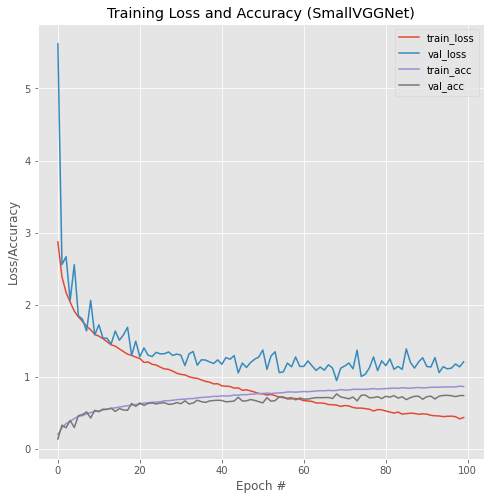

In [40]:
# plot the training loss and accuracy for model 2
N = np.arange(0, 100)
plt.style.use("ggplot")
plt.figure(figsize=(8,8))
plt.plot(N, H5.history["loss"], label="train_loss")
plt.plot(N, H5.history["val_loss"], label="val_loss")
plt.plot(N, H5.history["accuracy"], label="train_acc")
plt.plot(N, H5.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy (SmallVGGNet)")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()
plt.savefig("smallvggnet_plot.png")
plt.show()

We can see that overfitting is reduced by a large extent. So, Model 5 is the best, and this is our final model. Now we test some real life pictures with this model to check its accuracy.

# Prediction for some internet images

This image most likely belongs to swimming with a 99.99 percent confidence.


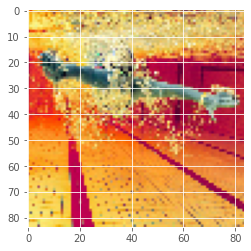

In [41]:
from skimage import io
import PIL
from keras.preprocessing import image
show_img=image.load_img('../input/images/image1.jpg', grayscale=False, target_size=(200, 200,3))
plt.imshow(show_img);

imagePath="../input/images/image1.jpg"
image = cv2.imread(imagePath)
image = cv2.resize(image, (84,84))
plt.imshow(image)

x = np.expand_dims(image, axis = 0)
x = np.array(x, dtype="float") / 255.0


prediction=model5.predict(x)
index=np.argmax(prediction[0])
print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(classes_name[index], 100 * np.max(prediction[0]))
)

This image most likely belongs to motogp with a 100.00 percent confidence.


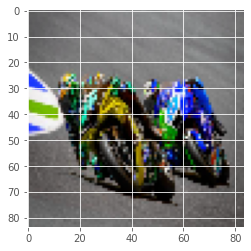

In [42]:
from skimage import io
import PIL
from keras.preprocessing import image
show_img=image.load_img('../input/images/iamge2.jpg', grayscale=False, target_size=(200, 200,3))
plt.imshow(show_img);

imagePath="../input/images/iamge2.jpg"
image = cv2.imread(imagePath)
image = cv2.resize(image, (84,84))
plt.imshow(image)

x = np.expand_dims(image, axis = 0)
x = np.array(x, dtype="float") / 255.0


prediction=model5.predict(x)
index=np.argmax(prediction[0])
print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(classes_name[index], 100 * np.max(prediction[0]))
)

This image most likely belongs to ice_hockey with a 99.61 percent confidence.


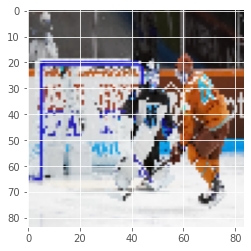

In [43]:
from skimage import io
import PIL
from keras.preprocessing import image
show_img=image.load_img('../input/images/image3.jpeg', grayscale=False, target_size=(200, 200,3))
plt.imshow(show_img);

imagePath="../input/images/image3.jpeg"
image = cv2.imread(imagePath)
image = cv2.resize(image, (84,84))
plt.imshow(image)

x = np.expand_dims(image, axis = 0)
x = np.array(x, dtype="float") / 255.0


prediction=model5.predict(x)
index=np.argmax(prediction[0])
print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(classes_name[index], 100 * np.max(prediction[0]))
)

This image most likely belongs to wrestling with a 100.00 percent confidence.


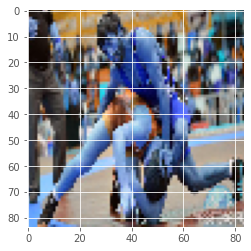

In [44]:
from skimage import io
import PIL
from keras.preprocessing import image
show_img=image.load_img('../input/images/image4.jpg', grayscale=False, target_size=(200, 200,3))
plt.imshow(show_img);

imagePath="../input/images/image4.jpg"
image = cv2.imread(imagePath)
image = cv2.resize(image, (84,84))
plt.imshow(image)

x = np.expand_dims(image, axis = 0)
x = np.array(x, dtype="float") / 255.0


prediction=model5.predict(x)
index=np.argmax(prediction[0])
print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(classes_name[index], 100 * np.max(prediction[0]))
)

This image most likely belongs to football with a 99.99 percent confidence.


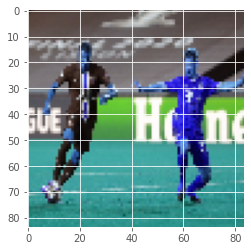

In [45]:
from skimage import io
import PIL
from keras.preprocessing import image
show_img=image.load_img('../input/images/image5.jpg', grayscale=False, target_size=(200, 200,3))
plt.imshow(show_img);

imagePath="../input/images/image5.jpg"
image = cv2.imread(imagePath)
image = cv2.resize(image, (84,84))
plt.imshow(image)

x = np.expand_dims(image, axis = 0)
x = np.array(x, dtype="float") / 255.0


prediction=model5.predict(x)
index=np.argmax(prediction[0])
print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(classes_name[index], 100 * np.max(prediction[0]))
)

This image most likely belongs to tennis with a 98.46 percent confidence.


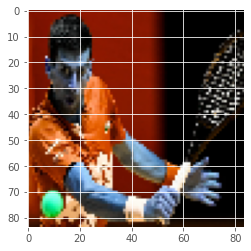

In [46]:
from skimage import io
import PIL
from keras.preprocessing import image
show_img=image.load_img('../input/images/image6.jpg', grayscale=False, target_size=(200, 200,3))
plt.imshow(show_img);

imagePath="../input/images/image6.jpg"
image = cv2.imread(imagePath)
image = cv2.resize(image, (84,84))
plt.imshow(image)

x = np.expand_dims(image, axis = 0)
x = np.array(x, dtype="float") / 255.0


prediction=model5.predict(x)
index=np.argmax(prediction[0])
print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(classes_name[index], 100 * np.max(prediction[0]))
)

We can see that model 5 is recognizing and classifying all images very nicely.

# **Conclusion**

We finally conclude that Model with specification

Conv2D0 -> Conv2D1 -> Batchnormalization0 -> Maxpool0 -> Dropout -> Cov2D2 -> Conv2D3 -> batchnormalization -> Maxpool1 -> Dropout -> Conv2D4 -> Conv2D5 -> Conv2D6 -> Batchnormalization -> Maxpool2 -> Dropout -> FC0 -> Dropout -> FC1 -> Dropout -> Softmax with RMSprop optimizer, 100 epoches and 32 batch-size is giving 72.98% accuracy on our test data. 
We can further improve our accuracy with more regularizations.